# **Cracking SpaceShip Titanic**
- Welcome to the year *2912*, where your data science skills are needed to solve a **cosmic mystery**. We've received a transmission from four lightyears away and things aren't looking good.
- The **Spaceship Titanic** was an `interstellar` passenger `liner` launched a month ago. With almost `13,000` passengers on board, the vessel set out on its maiden voyage *transporting emigrants* from our solar system to three newly habitable **exoplanets** orbiting nearby stars.
- While rounding `Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary` Spaceship Titanic collided with a **spacetime anomaly** hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<div align="center">
<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width=500px></img>
</div>

- To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
- Help save them and change history!

## Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./spaceship-titanic/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [6]:
df["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [7]:
df["CryoSleep"].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [8]:
df["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [9]:
df["Cabin"].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

# Split `Training` and `Testing` Set.

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Transported"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [11]:
strat_train_set.shape

(6954, 14)

In [12]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 3600 to 7925
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6785 non-null   object 
 2   CryoSleep     6786 non-null   object 
 3   Cabin         6793 non-null   object 
 4   Destination   6801 non-null   object 
 5   Age           6815 non-null   float64
 6   VIP           6796 non-null   object 
 7   RoomService   6809 non-null   float64
 8   FoodCourt     6800 non-null   float64
 9   ShoppingMall  6785 non-null   float64
 10  Spa           6804 non-null   float64
 11  VRDeck        6810 non-null   float64
 12  Name          6795 non-null   object 
 13  Transported   6954 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 767.4+ KB


In [13]:
strat_test_set.shape

(1739, 14)

In [14]:
X = strat_train_set.drop("Transported", axis=1)
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3600,3868_04,Earth,False,G/630/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Harrie Braymon
1262,1336_01,Earth,True,G/201/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,NaN
8612,9193_01,Earth,NaN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Camily Howence
5075,5422_01,Europa,True,D/164/S,55 Cancri e,26.0,False,0.0,0.0,0.0,NaN,0.0,Pleion Sperap
4758,5076_01,Earth,False,G/818/P,TRAPPIST-1e,13.0,False,0.0,0.0,60.0,1.0,5147.0,Alicey Wolferguson


In [15]:
y = strat_train_set["Transported"]
y.head()

3600     True
1262     True
8612    False
5075     True
4758    False
Name: Transported, dtype: bool

## Get Rid of Unnecessay `Features`
As we know that some of the Features in a dataset are not suitable for some Specific Purpose i.e there `Name` and `PassengerId`.

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class Cleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.drop(["Name", "PassengerId", "FoodCourt", "ShoppingMall", "Cabin"], axis=1)
        return X

# Deal with `Numerical` Values
- As we know that most of the Machine Learning Algorithms can only work with Numerical Values.
- So for that Need we are Going to Deal with these Numerical Values i.e
    - Use `OneHotEncoder` on `HomePlanet`, `CryoSleep`, `Cabin`, `Destination` and `VIP`.

In [17]:
from sklearn.preprocessing import OneHotEncoder

class ObjectEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        columns_to_encode = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
        encoder = OneHotEncoder()
        
        # Encode each attribute and add the columns to the DataFrame
        for column in columns_to_encode:
            matrix = encoder.fit_transform(X[[column]]).toarray()
            column_names = [f"{column}_{i}" for i in range(matrix.shape[1])]
        
            for i in range(len(matrix.T)):
                X[column_names[i]] = matrix.T[i]

        # Remove Old Parameters
        X = X.drop(["HomePlanet", "CryoSleep", "Destination", "VIP"], axis=1)

        return X

In [18]:
from sklearn.preprocessing import LabelEncoder

class LabelYEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        return y_encoded

label_y_encoder = LabelYEncoder()
y_encoded = label_y_encoder.fit_transform(y)

# Use `SimpleImputer` to fill all of the `Blank Values`

In [19]:
from sklearn.impute import SimpleImputer

class NullImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        features_with_missing_values = X.columns[X.isnull().any()].tolist()
        imputer = SimpleImputer(strategy='median')
        X[features_with_missing_values] = imputer.fit_transform(X[features_with_missing_values])
        return X

# Create a `Pipeline` Containing all of the `Custom Transformers`.

In [20]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("cleaner", Cleaner()),
    ("object_encoder", ObjectEncoder()),
    ("null_imputer", NullImputer()),
])

In [21]:
X = pipeline.fit_transform(X)

# Correlation `Matrix`

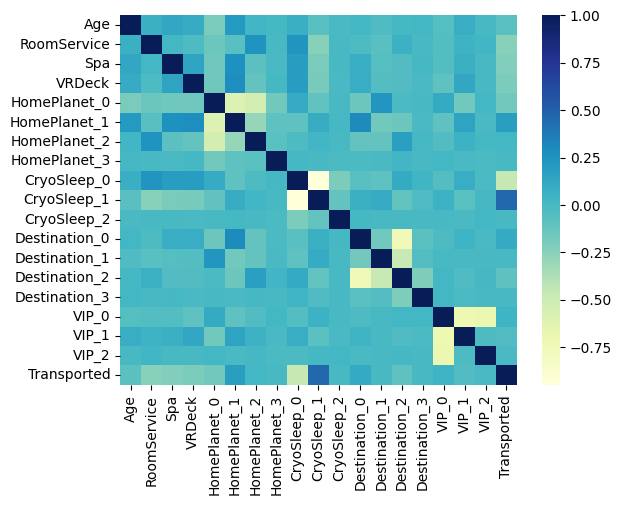

In [22]:
import seaborn as sns
df_updated = X.copy()
df_updated["Transported"] = y_encoded
numeric_columns = df_updated.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

In [23]:
correlation_matrix["Transported"].sort_values(ascending=False)

Transported      1.000000
CryoSleep_1      0.462554
HomePlanet_1     0.179583
Destination_0    0.102449
VIP_0            0.033975
HomePlanet_2     0.016335
Destination_3    0.001863
Destination_1    0.000143
HomePlanet_3    -0.003936
CryoSleep_2     -0.004878
VIP_2           -0.006887
VIP_1           -0.040546
Age             -0.078748
Destination_2   -0.089577
HomePlanet_0    -0.166334
VRDeck          -0.203870
Spa             -0.218170
RoomService     -0.245257
CryoSleep_0     -0.454394
Name: Transported, dtype: float64

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 3600 to 7925
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            6954 non-null   float64
 1   RoomService    6954 non-null   float64
 2   Spa            6954 non-null   float64
 3   VRDeck         6954 non-null   float64
 4   HomePlanet_0   6954 non-null   float64
 5   HomePlanet_1   6954 non-null   float64
 6   HomePlanet_2   6954 non-null   float64
 7   HomePlanet_3   6954 non-null   float64
 8   CryoSleep_0    6954 non-null   float64
 9   CryoSleep_1    6954 non-null   float64
 10  CryoSleep_2    6954 non-null   float64
 11  Destination_0  6954 non-null   float64
 12  Destination_1  6954 non-null   float64
 13  Destination_2  6954 non-null   float64
 14  Destination_3  6954 non-null   float64
 15  VIP_0          6954 non-null   float64
 16  VIP_1          6954 non-null   float64
 17  VIP_2          6954 non-null   float64
dtypes: float64

# `Scale` the Dataset

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
X_data

array([[-1.99614927, -0.33634009, -0.26731106, ...,  0.21854643,
        -0.15296914, -0.15247613],
       [-0.81170305, -0.33634009, -0.26731106, ...,  0.21854643,
        -0.15296914, -0.15247613],
       [ 0.44241648, -0.33634009, -0.26731106, ...,  0.21854643,
        -0.15296914, -0.15247613],
       ...,
       [ 1.13914955, -0.33484757,  0.2749073 , ...,  0.21854643,
        -0.15296914, -0.15247613],
       [-0.3239899 , -0.33634009, -0.26731106, ...,  0.21854643,
        -0.15296914, -0.15247613],
       [-0.53300982, -0.28857947, -0.26731106, ...,  0.21854643,
        -0.15296914, -0.15247613]])

In [26]:
y_encoded

array([1, 1, 0, ..., 1, 1, 1])

# Train Different `Models` on the `Dataset` that we have Prepared
Here are Some of the `Machine Learning Models` that we are Going to Try :-
- Decision Tree Regressor
- Logistic Regression
- Random Forest Classifier
- XGBoost (eXtreme Gradient Boosting)

## Training `Decision Tree Classifier`

In [27]:
from sklearn.tree import DecisionTreeClassifier
decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_data, y_encoded)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = decision_clf.predict(X_data)
print(f"""
    Accuracy: {accuracy_score(y, y_pred) * 100}%,
    Precision Score: {precision_score(y, y_pred) * 100}%,
    Recall Score: {recall_score(y, y_pred) * 100}%,
    F1 Score: {f1_score(y, y_pred) * 100}%
""")


    Accuracy: 93.34196146102963%,
    Precision Score: 90.85775746168325%,
    Recall Score: 96.48772130211309%,
    F1 Score: 93.58814568619304%



In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": range(2, 10),
    "splitter": ["best", "random"],
    "criterion": ["gini", "entropy"]
}
decision_clf_grid = GridSearchCV(decision_clf, param_grid, cv=5)
decision_clf_grid.fit(X_data, y_encoded)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'splitter': ['best', 'random']})

In [30]:
decision_clf_best = decision_clf_grid.best_estimator_

In [31]:
y_pred = decision_clf_best.predict(X_data)
print(f"""
    Accuracy: {accuracy_score(y, y_pred) * 100}%,
    Precision Score: {precision_score(y, y_pred) * 100}%,
    Recall Score: {recall_score(y, y_pred) * 100}%,
    F1 Score: {f1_score(y, y_pred) * 100}%
""")


    Accuracy: 78.91860799539833%,
    Precision Score: 75.12339585389931%,
    Recall Score: 86.92175899486007%,
    F1 Score: 80.59306327773365%



## Training `Logistic Regression`

In [32]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_data, y_encoded)

LogisticRegression()

In [33]:
y_pred = logistic_reg.predict(X_data)
print(f"""
    Accuracy: {accuracy_score(y, y_pred) * 100}%,
    Precision Score: {precision_score(y, y_pred) * 100}%,
    Recall Score: {recall_score(y, y_pred) * 100}%,
    F1 Score: {f1_score(y, y_pred) * 100}%
""")


    Accuracy: 77.063560540696%,
    Precision Score: 78.4033363121835%,
    Recall Score: 75.15705311250714%,
    F1 Score: 76.74588132380813%



## Training `Random Forest Classifier`

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_data, y_encoded)

RandomForestClassifier()

In [35]:
y_pred = forest_clf.predict(X_data)
print(f"""
    Accuracy: {accuracy_score(y, y_pred) * 100}%,
    Precision Score: {precision_score(y, y_pred) * 100}%,
    Recall Score: {recall_score(y, y_pred) * 100}%,
    F1 Score: {f1_score(y, y_pred) * 100}%
""")


    Accuracy: 93.34196146102963%,
    Precision Score: 90.16653449643141%,
    Recall Score: 97.40148486579098%,
    F1 Score: 93.64447494852438%



In [36]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

forest_clf_grid = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv=5, verbose=2)
forest_clf_grid.fit(X_data, y_encoded)
forest_clf_best = forest_clf_grid.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf

In [38]:
y_pred = forest_clf_best.predict(X_data)
print(f"""
    Accuracy: {accuracy_score(y, y_pred) * 100}%,
    Precision Score: {precision_score(y, y_pred) * 100}%,
    Recall Score: {recall_score(y, y_pred) * 100}%,
    F1 Score: {f1_score(y, y_pred) * 100}%
""")


    Accuracy: 76.01380500431407%,
    Precision Score: 80.62792251169004%,
    Recall Score: 68.93203883495146%,
    F1 Score: 74.32266009852218%



## Training `XGBoost Classifier`

In [39]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_data, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = xgb_clf.predict(X_data)
print(f"""
    Accuracy: {accuracy_score(y, y_pred) * 100}%,
    Precision Score: {precision_score(y, y_pred) * 100}%,
    Recall Score: {recall_score(y, y_pred) * 100}%,
    F1 Score: {f1_score(y, y_pred) * 100}%
""")


    Accuracy: 86.0655737704918%,
    Precision Score: 83.40807174887892%,
    Recall Score: 90.29126213592234%,
    F1 Score: 86.71328671328672%



In [41]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
}
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=5)
grid_search.fit(X_data, y_encoded)
xgd_best = grid_search.best_estimator_
xgd_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = xgd_best.predict(X_data)
print(f"""
    Accuracy: {accuracy_score(y, y_pred) * 100}%,
    Precision Score: {precision_score(y, y_pred) * 100}%,
    Recall Score: {recall_score(y, y_pred) * 100}%,
    F1 Score: {f1_score(y, y_pred) * 100}%
""")


    Accuracy: 79.09117054932413%,
    Precision Score: 76.75026123301986%,
    Recall Score: 83.89491719017704%,
    F1 Score: 80.1637107776262%



# Test all of the `Models` on `Testing Data`

## Prepare Testing Dataset

In [44]:
strat_test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3586,3857_01,Europa,True,E/230/P,55 Cancri e,34.0,False,0.0,0.0,NaN,0.0,0.0,Eltard Dreamspric,True
7173,7650_05,Earth,True,G/1242/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Tera Palmes,False
8559,9139_01,Mars,False,F/1766/S,TRAPPIST-1e,25.0,False,410.0,32.0,14.0,1239.0,10.0,Poselk Paste,False
6528,6894_03,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,True
7934,8471_01,Europa,False,E/556/S,55 Cancri e,66.0,True,0.0,1828.0,1.0,1873.0,45.0,Bosonon Metiveal,False


In [46]:
X_test = strat_test_set.drop("Transported", axis=1)
X_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3586,3857_01,Europa,True,E/230/P,55 Cancri e,34.0,False,0.0,0.0,NaN,0.0,0.0,Eltard Dreamspric
7173,7650_05,Earth,True,G/1242/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Tera Palmes
8559,9139_01,Mars,False,F/1766/S,TRAPPIST-1e,25.0,False,410.0,32.0,14.0,1239.0,10.0,Poselk Paste
6528,6894_03,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7934,8471_01,Europa,False,E/556/S,55 Cancri e,66.0,True,0.0,1828.0,1.0,1873.0,45.0,Bosonon Metiveal


In [47]:
X_test_prepared = pipeline.fit_transform(X_test)
X_test_prepared.head()

,Age,RoomService,Spa,VRDeck,HomePlanet_0,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep_0,CryoSleep_1,CryoSleep_2,Destination_0,Destination_1,Destination_2,Destination_3,VIP_0,VIP_1,VIP_2
3586,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7173,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8559,25.0,410.0,1239.0,10.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6528,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7934,66.0,0.0,1873.0,45.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
X_test_prepared = scaler.fit_transform(X_test_prepared)
X_test_prepared

array([[ 0.32407255, -0.32016367, -0.28425615, ...,  0.22669488,
        -0.15343813, -0.16298572],
       [-1.7774644 , -0.32016367, -0.28425615, ...,  0.22669488,
        -0.15343813, -0.16298572],
       [-0.30638854,  0.34063099,  0.8369599 , ...,  0.22669488,
        -0.15343813, -0.16298572],
       ...,
       [-1.07695208, -0.32016367, -0.28425615, ...,  0.22669488,
        -0.15343813, -0.16298572],
       [-0.23633731, -0.15254747, -0.03087399, ...,  0.22669488,
        -0.15343813, -0.16298572],
       [ 0.53422624,  0.83219774, -0.28425615, ...,  0.22669488,
        -0.15343813, -0.16298572]])

In [50]:
y_test = strat_test_set["Transported"]
y_test.head()

3586     True
7173    False
8559    False
6528     True
7934    False
Name: Transported, dtype: bool

In [51]:
y_test_prepared = label_y_encoder.fit_transform(y_test)
y_test_prepared

array([1, 1, 0, ..., 1, 1, 1])

## Testing `Decision Tree Classifier`

In [55]:
y_pred = decision_clf.predict(X_test_prepared)
print(f"""
    Accuracy: {accuracy_score(y_test, y_pred) * 100}%,
    Precision Score: {precision_score(y_test, y_pred) * 100}%,
    Recall Score: {recall_score(y_test, y_pred) * 100}%,
    F1 Score: {f1_score(y_test, y_pred) * 100}%
""")


    Accuracy: 70.50028752156412%,
    Precision Score: 68.09571286141576%,
    Recall Score: 77.96803652968036%,
    F1 Score: 72.69824374667377%



In [56]:
y_pred = decision_clf_best.predict(X_test_prepared)
print(f"""
    Accuracy: {accuracy_score(y_test, y_pred) * 100}%,
    Precision Score: {precision_score(y_test, y_pred) * 100}%,
    Recall Score: {recall_score(y_test, y_pred) * 100}%,
    F1 Score: {f1_score(y_test, y_pred) * 100}%
""")


    Accuracy: 77.80333525014376%,
    Precision Score: 73.83268482490273%,
    Recall Score: 86.64383561643835%,
    F1 Score: 79.72689075630251%



## Testing `Logistic Regression`

In [57]:
y_pred = logistic_reg.predict(X_test_prepared)
print(f"""
    Accuracy: {accuracy_score(y_test, y_pred) * 100}%,
    Precision Score: {precision_score(y_test, y_pred) * 100}%,
    Recall Score: {recall_score(y_test, y_pred) * 100}%,
    F1 Score: {f1_score(y_test, y_pred) * 100}%
""")


    Accuracy: 76.48073605520413%,
    Precision Score: 79.00621118012423%,
    Recall Score: 72.6027397260274%,
    F1 Score: 75.66924449732302%



## Testing `Random Forest Regressor`

In [58]:
y_pred = forest_clf.predict(X_test_prepared)
print(f"""
    Accuracy: {accuracy_score(y_test, y_pred) * 100}%,
    Precision Score: {precision_score(y_test, y_pred) * 100}%,
    Recall Score: {recall_score(y_test, y_pred) * 100}%,
    F1 Score: {f1_score(y_test, y_pred) * 100}%
""")


    Accuracy: 78.66589994249568%,
    Precision Score: 78.79133409350057%,
    Recall Score: 78.88127853881278%,
    F1 Score: 78.83628066172275%



In [59]:
y_pred = forest_clf_best.predict(X_test_prepared)
print(f"""
    Accuracy: {accuracy_score(y_test, y_pred) * 100}%,
    Precision Score: {precision_score(y_test, y_pred) * 100}%,
    Recall Score: {recall_score(y_test, y_pred) * 100}%,
    F1 Score: {f1_score(y_test, y_pred) * 100}%
""")


    Accuracy: 73.26049453709028%,
    Precision Score: 81.5668202764977%,
    Recall Score: 60.61643835616438%,
    F1 Score: 69.54813359528487%



## Testing `XGBoost Classifier`

In [60]:
y_pred = xgb_clf.predict(X_test_prepared)
print(f"""
    Accuracy: {accuracy_score(y_test, y_pred) * 100}%,
    Precision Score: {precision_score(y_test, y_pred) * 100}%,
    Recall Score: {recall_score(y_test, y_pred) * 100}%,
    F1 Score: {f1_score(y_test, y_pred) * 100}%
""")


    Accuracy: 76.88326624496837%,
    Precision Score: 75.81699346405229%,
    Recall Score: 79.45205479452055%,
    F1 Score: 77.59197324414716%



In [61]:
y_pred = xgd_best.predict(X_test_prepared)
print(f"""
    Accuracy: {accuracy_score(y_test, y_pred) * 100}%,
    Precision Score: {precision_score(y_test, y_pred) * 100}%,
    Recall Score: {recall_score(y_test, y_pred) * 100}%,
    F1 Score: {f1_score(y_test, y_pred) * 100}%
""")


    Accuracy: 78.0333525014376%,
    Precision Score: 76.90631808278867%,
    Recall Score: 80.59360730593608%,
    F1 Score: 78.70680044593088%

